<a href="https://colab.research.google.com/github/harsha3038/23CSBTB45-46/blob/main/AIML_Lab_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
file_path = '/content/drive/MyDrive/car price prediction.csv'
data = pd.read_csv(file_path)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/car price prediction.csv'

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [22]:
file_path = '/content/car price prediction.csv'
data = pd.read_csv(file_path)

In [23]:
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = data.select_dtypes(include=['object']).columns

In [24]:
print("Numeric Columns:", numeric_columns)
print("Categorical Columns:", categorical_columns)

Numeric Columns: Index(['Unnamed: 0', 'year', 'selling_price', 'km_driven', 'seats',
       'max_power (in bph)', 'Mileage', 'Engine (CC)'],
      dtype='object')
Categorical Columns: Index(['name', 'fuel', 'seller_type', 'transmission', 'owner', 'Mileage Unit'], dtype='object')


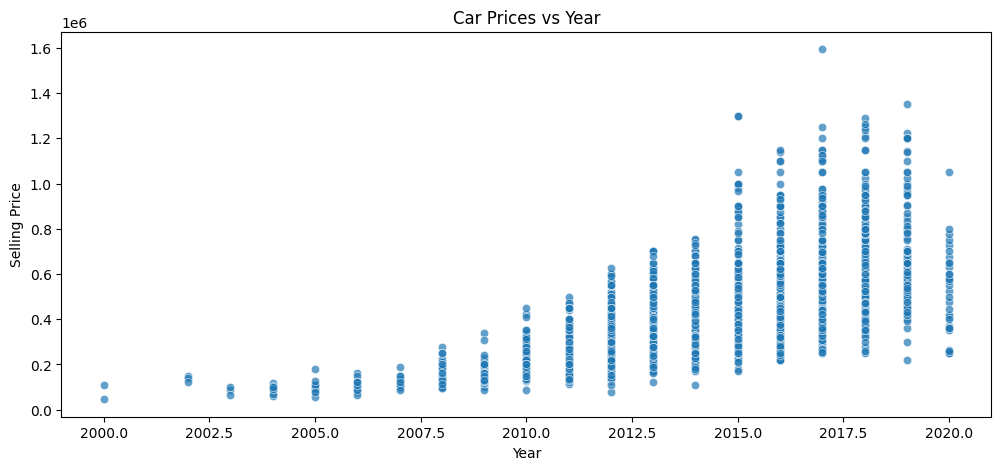

In [25]:
plt.figure(figsize=(12, 5))
sns.scatterplot(data=data, x='year', y='selling_price', alpha=0.7)
plt.title('Car Prices vs Year')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.show()

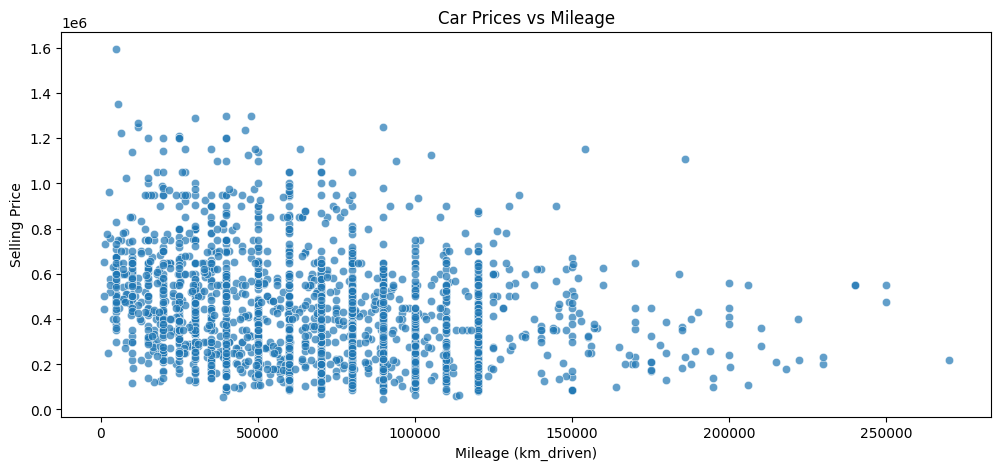

In [26]:
plt.figure(figsize=(12, 5))
sns.scatterplot(data=data, x='km_driven', y='selling_price', alpha=0.7)
plt.title('Car Prices vs Mileage')
plt.xlabel('Mileage (km_driven)')
plt.ylabel('Selling Price')
plt.show()

In [27]:
data_encoded = pd.get_dummies(data, columns=['fuel', 'seller_type', 'transmission', 'owner'], drop_first=True)


In [28]:
data_encoded = data_encoded.drop(columns=['name', 'Unnamed: 0', 'Mileage Unit'])


In [29]:
data_encoded.loc[5:10, 'selling_price'] = np.nan


In [30]:
data_encoded['selling_price'] = data_encoded['selling_price'].interpolate()


In [31]:
X = data_encoded.drop(columns=['selling_price'])
y = data_encoded['selling_price']


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [33]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [34]:
y_pred = model.predict(X_test)

In [35]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Square Error (RMSE): {rmse:.2f}")


Root Mean Square Error (RMSE): 72368.02
